# Part II - ProsperLoan Data Exploration
## Alex Akaolisah

## Investigation Overview


> The Prosper Rating and prosper scores for Borrowers are very vital to the borrowing and lending dynamics as expressed in the reviewd data. Lenders had more confidence on Borrowers who had high prosper ratings and high prosper scores hence they could borrow  higher sums at lower interest rates (Borrowerrate). This means that Lenders were willing to take lower yield from loans given to high-rating borrowers


## Dataset Overview

>The [dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn) provided by udacity consists of 113937 rows and 81 columns of loan data.This corresponds to 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This data [dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) explains the variables in the data set.
The dataset however was reduced to a dataframe of 84881 rows and 32 columns carefully chosen for the exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
prosper=pd.read_csv('prosper.csv')

#displaying first 5 rows
prosper.head(5)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,Prosper_Rating,ProsperScore,Listing_Category,...,LP_ServiceFees,PercentFunded,creation_date,creation_time,MaxLenderYield,MaxBorrowerRate,MaxBorrowerAPR,MeanLenderYield,MeanBorrowerRate,MeanBorrowerAPR
0,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,A,7.0,2,...,0.00,1.0,2014-02-27,08:28:07.900000,0.34,0.36,0.42395,0.186007,0.196011,0.226647
1,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,A,9.0,16,...,-108.01,1.0,2012-10-22,11:02:35.010000,0.34,0.36,0.42395,0.186007,0.196011,0.226647
2,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,D,4.0,2,...,-60.27,1.0,2013-09-14,18:38:39.097000,0.34,0.36,0.42395,0.186007,0.196011,0.226647
3,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,0.1214,B,10.0,1,...,-25.33,1.0,2013-12-14,08:26:37.093000,0.34,0.36,0.42395,0.186007,0.196011,0.226647
4,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,36,Current,0.31032,0.2712,0.2612,E,2.0,1,...,-22.95,1.0,2013-04-12,09:52:56.147000,0.34,0.36,0.42395,0.186007,0.196011,0.226647


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
>### How prosper rated their borrowers from HR(High Risk) to AA(Excellence)
- The distribution of rating across the entire borrowers population revealed that Most borrowers (27%) recieved average prosper rating
- Only 6 percent of Borrowers recieved excellent rating

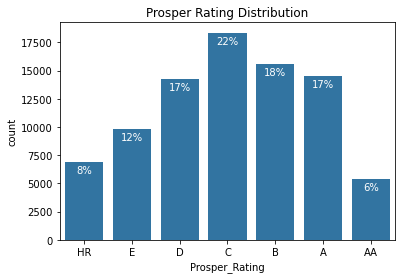

In [7]:

base_color=sb.color_palette()[0]

#Change prosper ratings to categorical ordered set
Prosper_Rating=['HR','E','D','C', 'B', 'A', 'AA']
prosper_ratings = pd.api.types.CategoricalDtype(ordered = True,categories = Prosper_Rating)
prosper['Prosper_Rating'] = prosper['Prosper_Rating'].astype(prosper_ratings);

#Plot a bar chart of the variable
sb.countplot(data=prosper,x='Prosper_Rating',color=base_color,);
plt.title('Prosper Rating Distribution');

n_prosper = prosper.shape[0]
# Count the frequency of unique values in the `ProsperRating` column 
type_counts = prosper['Prosper_Rating'].value_counts()
# add annotations
i, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for i, label in zip(i, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_prosper)

    # print the annotation just below the top of the bar
    plt.text(i,  count-1000, pct_string, ha = 'center', color = 'w');

## (Visualization 2) Prosper rating Vs Loan amount

>- The Higher their Prosper ratings, The higher the amount of loan the Borrower can borrow.
- This is a depiction of the lenders' confidence

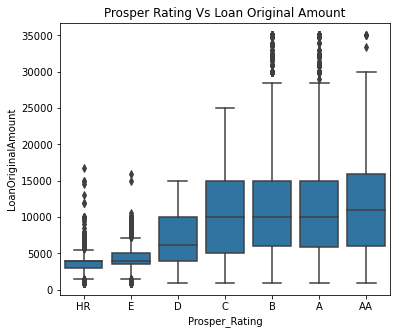

In [9]:
plt.figure(figsize=[13,5])
plt.subplot(1,2,1)
colors=sb.color_palette()[0]
sb.boxplot(data=prosper, x='Prosper_Rating', y='LoanOriginalAmount', color=colors,);
plt.title('Prosper Rating Vs Loan Original Amount');

## (Visualization 3) Prosper Score Vs Borrower Rate on Home ownership

- Home ownership (collateral security) has no defined effect on the rate at which borrowers got their loans
- Borrowers with Lower ratings got Higher loan interest rates
- Theres a remarkable negative correlation between Borrower rate and Prosper score

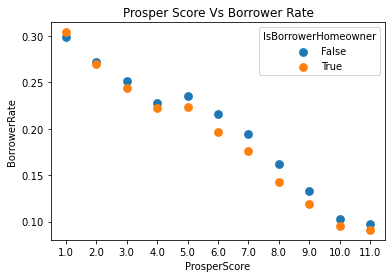

In [12]:
sb.pointplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci=None, linestyles = '')
plt.title('Prosper Score Vs Borrower Rate');

In [1]:
!jupyter nbconvert Part_II_presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_presentation.ipynb to slides
[NbConvertApp] Writing 635244 bytes to Part_II_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\THIS PC\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\THIS PC\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\THIS PC\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\THIS PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\THIS PC\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_file